In [1]:
%matplotlib inline
import numpy as np
from numpy import genfromtxt  
from scipy.stats import norm
import matplotlib.pyplot as plt

In [18]:
def em(data, k, n=10):
    '''
    vanilla 1d expectation maximazation algorithm
    
    data 1d numpy array of data
    k number of normal distributions
    n number of em repetitions
    '''
    
    # ensure data are 1d
    data = data.flatten()
    
    # list of means and variances of the k normal distributions to be fitted
    # init randomly between min and max points of data
    min_data, max_data = data.min(), data.max() 
    
    mean = np.random.uniform(low=min_data, high=max_data, size=k)
    variance = np.random.uniform(low=np.absolute(min_data / 2), high=np.absolute(max_data/2, size=k))
    
    # assume priors are equal
    prior = 1 / k
    
    # repeat algorithm n times
    for i in range(n):
    
        p_x_b = []
        
        # loop through each distribution j
        for j in range(k):
            # calcualate for each point the probability that it belongs to the distribution j
            p_x_b.append((1 / np.sqrt(2 * np.pi * variance[j])) * np.exp(-((data - mean[j]) ** 2) / (2 * variance[j])))
        
        for j in range(k):
            # calculate for each point the probability that it belongs to a distribution,
            # summing up to one ('colorings of the points')
            
        
    
em(np.arange(20), 4) 

[11.26821287  5.1233417  16.09725619 10.36847277] [1.55094114 8.45823803 8.01960298 7.05106229]


In [27]:
data = norm.rvs(1, 1, 40)
 
mu = 1  #data.mean()
var = 1#data.var()
p = (1 / np.sqrt(2 * np.pi * var) * np.exp(-((data - mu) ** 2) / (2 * var)))
mu, var, p

(1,
 1,
 array([0.39400276, 0.39518213, 0.24342295, 0.31461123, 0.05136829,
        0.16580826, 0.2584552 , 0.31999725, 0.2004171 , 0.33504143,
        0.39732853, 0.38382476, 0.27531536, 0.39422092, 0.24654536,
        0.25764678, 0.39353201, 0.38897035, 0.19623569, 0.31335157,
        0.3917728 , 0.22320274, 0.32537475, 0.12988029, 0.31069666,
        0.39082201, 0.21466019, 0.31205935, 0.39359435, 0.23152042,
        0.06624961, 0.29516369, 0.26591176, 0.25084063, 0.20997874,
        0.38479987, 0.13484087, 0.13607707, 0.39537354, 0.12239252]))

### Datasets

In [3]:
def load_iris():
    '''
    Returns a column of all petal lengths.
    '''
    X = genfromtxt("./data/iris.csv", delimiter=',', skip_header=1)
    X = X[:,2]
    X = X.reshape(-1, 1)
    return X

def load_bdp():
    '''
    Returns a column of systolic and diastolic blood pressure values.
    '''
    Z = genfromtxt("./data/bdp.csv", delimiter=',', skip_header=1)
    n = Z.shape[0]
    X = np.zeros(2*n)
    X[:n] = Z[:,2]
    X[n:] = Z[:,3]
    X = X.reshape(-1,1)
    return X

def sample(pi, mu, std, n):
    '''
    Returns a column of n values drawn from a normal mixture model.
    
    Parameter
        pi  k mixing coefficients
        mu  k means
        std k standard deviations
        n   number of data points
        
    Return
        n data points randomly sampled from specified mixture. 
    '''
    y = np.random.choice(len(pi), size=n, p=pi)
    x = np.zeros((n,1))
    for i, comp in enumerate(y):
        x[i] = norm.rvs(mu[comp], std[comp])
    return x


### Examples

In [4]:
# generate n points from a mixture of fived normal distributions
n = 1000
mu = [100, 150, 200]
std = 5*np.ones(len(mu))
pi = np.ones(len(mu))/len(mu)
x = sample(pi, mu, std, n)
x.shape

(1000, 1)

In [5]:
# load petal lengths of iris flowers
x = load_iris()
x.shape

(150, 1)

In [6]:
# load blood pressures
x = load_bdp()
x.shape

(302, 1)

### Distribution of Data

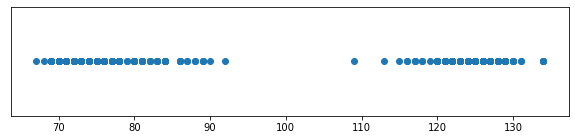

In [7]:
# show data
plt.subplots(figsize=(10,2))
plt.scatter(x, np.zeros((len(x),1)))
plt.yticks(())
plt.show()